## load libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
from matplotlib import gridspec

import math
import glob
import os

from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [2]:
import matplotlib
matplotlib.get_backend()

display(matplotlib.rcParams)

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

## load excel file

In [3]:
file_Name = "24Sept19.xls"
file_Path = "/Users/quinnvinlove/Documents/sugarsBio/excel/"

df = pd.read_excel(file_Path + file_Name)

In [4]:
df

,Row,Identifier 1,Identifier 2,Rt,Component,d 13C/12C,Ampl 44,BGD 44,Width,Notes
0,2,AA std,1,44.9,CO2-1,-25.145,5861,5.6,23.0,NaN
1,2,AA std,1,84.6,CO2-2,-25.220,5865,6.1,23.2,NaN
2,2,AA std,1,124.6,CO2-3,-25.220,5866,6.2,23.0,NaN
3,2,AA std,1,164.3,CO2-4,-25.263,5867,6.3,23.2,NaN
4,2,AA std,1,204.2,CO2-5,-25.292,5867,6.4,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2119,54,AA std,14,1651.9,Tyr,-27.249,4194,32.2,18.4,NaN
2120,54,AA std,14,1669.3,His,-17.102,969,32.2,12.7,NaN
2121,54,AA std,14,1925.9,CO2-7,-25.055,6073,13.2,22.8,NaN
2122,54,AA std,14,1965.9,CO2-8,-25.220,6072,14.1,22.8,NaN


## format data into more easily processable shape

In [5]:
def generateChem(df):
    aa = df[['Row', 'Component', 'd 13C/12C']]
    aa = aa.drop(aa[aa['Component'] == 'Blank'].index)
    
    aa = aa.drop(aa[pd.isna(aa['Component'])].index)

    out = aa.pivot(index='Row', columns='Component', values='d 13C/12C').bfill().iloc[[0],:]
    out.insert(0, 'Identifier 1', df['Identifier 1'].unique())
    out.insert(1, 'Identifier 2', df['Identifier 2'].unique())

    out.columns.name = None

    return out

In [6]:
_all = pd.concat([generateChem(df2) for _, df2 in df.groupby(['Identifier 1', 'Identifier 2'])])
_all = _all.sort_index()

In [7]:
_all

,Identifier 1,Identifier 2,Ala,Asp,Asp1,CO2-1,CO2-2,CO2-3,CO2-4,CO2-5,...,Nonadecane,Phe,Pro,Ser,Ser1,Thr,Tyr,Val,nLeu,Phe1
Row,,,,,,,,,,,,,,,,,,,,,
2,AA std,1,-26.597,-30.606,-30.799,-25.145,-25.22,-25.22,-25.263,-25.292,...,-24.280,-16.316,-19.733,-28.193,-28.533,-25.509,-27.047,-20.058,-29.800,NaN
3,SB15 T2 S,1,-26.807,-25.664,NaN,-25.152,-25.22,-25.22,-25.248,-25.290,...,-24.137,-26.254,-21.627,-26.960,NaN,-22.752,-27.782,-28.527,-29.887,-26.117
4,SB15 T2 S,2,-26.947,-25.823,NaN,-25.155,-25.22,-25.22,-25.252,-25.268,...,-24.091,-26.203,-21.785,-26.881,NaN,-22.865,-27.883,-28.704,-29.759,-26.026
5,SB15 T2 S,3,-27.073,-25.939,NaN,-25.136,-25.22,-25.22,-25.240,-25.270,...,-24.003,-26.150,-21.889,-27.076,NaN,-22.620,-27.814,-28.739,-29.849,-26.011
6,AA std,2,-27.252,-30.367,-30.720,-25.162,-25.22,-25.22,-25.240,-25.291,...,-23.970,-16.317,-19.723,-28.012,-28.495,-25.423,-27.125,-20.357,-29.575,NaN
7,SB77 T2 S,1,-28.146,-25.337,NaN,-25.131,-25.22,-25.22,-25.249,-25.278,...,-23.925,-26.222,-22.274,-25.956,NaN,-21.965,-27.983,-28.911,-29.485,NaN
8,SB77 T2 S,2,-28.326,-25.353,NaN,-25.147,-25.22,-25.22,-25.258,-25.274,...,-24.062,-26.266,-22.278,-25.870,NaN,-21.962,-27.906,-29.022,-29.520,NaN
9,SB77 T2 S,3,-28.412,-25.456,NaN,-25.151,-25.22,-25.22,-25.241,-25.275,...,-23.946,-26.182,-22.238,-6.246,NaN,-21.903,-27.838,-28.986,-29.459,NaN
10,AA std,3,-27.735,-30.561,-30.655,-25.140,-25.22,-25.22,-25.261,-25.283,...,-24.029,-16.264,-19.540,-28.135,-28.204,-25.360,-27.124,-20.484,-29.381,NaN


## generate aa sheet

In [8]:
temp_aa = _all[_all['Identifier 1'] == 'AA std']
temp_aa = temp_aa.drop(['Identifier 1', 'Identifier 2'], axis=1)
aa_std = temp_aa.apply(np.std, axis=0)
aa_avg = temp_aa.apply(np.mean, axis=0)
aa = pd.concat([aa_std, aa_avg], axis=1, keys=['SD', 'mean'])
aa = aa.dropna()

In [9]:
aa

,SD,mean
Ala,4.016108e-01,-27.686429
Asp,1.673473e-01,-30.253500
Asp1,9.061215e-02,-30.668727
CO2-1,8.666143e-03,-25.150571
CO2-2,3.552714e-15,-25.220000
CO2-3,3.552714e-15,-25.220000
CO2-4,1.134815e-02,-25.249929
CO2-5,1.456372e-02,-25.272429
CO2-6,2.593329e-02,-25.218500
CO2-7,1.366304e-02,-25.058500


## generate is 'sheet'

In [10]:
temp_is = _all[['nLeu', 'Nonadecane', 'Caffeine']]
is_std = temp_is.apply(np.std, axis=0)
is_avg = temp_is.apply(np.mean, axis=0)
_is = pd.concat([is_std, is_avg], axis=1, keys=['SD', 'mean'])

In [11]:
_is

,SD,mean
nLeu,0.157345,-29.489943
Nonadecane,0.070027,-24.030094
Caffeine,0.077616,-28.841585


## generate check sheet

In [12]:
_all[_all['Identifier 1'] == 'Check S']

,Identifier 1,Identifier 2,Ala,Asp,Asp1,CO2-1,CO2-2,CO2-3,CO2-4,CO2-5,...,Nonadecane,Phe,Pro,Ser,Ser1,Thr,Tyr,Val,nLeu,Phe1
Row,,,,,,,,,,,,,,,,,,,,,
23,Check S,1,-27.820,-25.528,-26.825,-25.148,-25.22,-25.22,-25.198,-25.216,...,-23.993,-26.258,-22.712,-26.775,-27.215,-22.921,-27.843,-28.885,-29.483,-26.282
24,Check S,2,-27.892,-25.701,-26.607,-25.152,-25.22,-25.22,-25.246,-25.293,...,-24.104,-26.303,-22.907,-26.793,-27.147,-22.955,-27.573,-28.874,-29.487,-26.192
25,Check S,3,-27.727,-25.626,-26.705,-25.140,-25.22,-25.22,-25.264,-25.275,...,-24.068,-26.175,-23.092,-26.835,-27.427,-23.031,-27.676,-28.826,-29.533,-26.123


In [13]:
#generate time series for His
def plotTimeSeries(compound):
    def outliar(data):
        osd = np.std(data)
        om = np.mean(data)
        upper = om + (2*osd)
        lower = om - (2*osd)
        
        return upper, lower
    
    #draw subplots
    fig, (ax1, ax2) = plt.subplots(2, 1)
    
    #select data
    std = _all[_all['Identifier 1'] == 'AA std']
    other = _all[_all['Identifier 1'] != 'AA std']
    
    
    upper, lower = outliar(other[compound])
    test_color = ['yellow' if x > upper or x < lower else 'green' for x in other[compound]]
    
    upper, lower = outliar(std[compound])
    aa_color = ['yellow' if x > upper or x < lower else 'blue' for x in std[compound]]
    
    
    #draw scatter
    ax1.scatter(std.index, std[compound], c=aa_color)
    ax2.scatter(other.index, other[compound], c=test_color)
    
    #draw mean
    ax1.axhline(np.mean(std[compound]), color='black')
    ax2.axhline(np.mean(other[compound]), color='black')
    
    #set scatter ticks
    ax1.set_xticks(_all.index)
    ax2.set_xticks(_all.index)
    
    #set tick spacing
    tick_spacing = 2
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
    #set title and show plot
    fig.suptitle("d 13C/12C for " + compound + "\n" + file_Name)
    plt.show()
    
    #draw subplots for histogram?
    
    
    return

## scatter overview

In [14]:
def outlier(data):
        osd = np.std(data)
        om = np.mean(data)
        upper = om + (2*osd)
        lower = om - (2*osd)
        
        return upper, lower

def plotCompoundTimeSeries(data, compound, primaryColor, secondaryColor, ax):
    work = data[compound]
     
    upper, lower = outlier(work)
    color = [secondaryColor if x > upper or x < lower else primaryColor for x in work]
    
    #draw scatter
    ax.scatter(data.index, work, c=color)
    
    #draw mean
    ax.axhline(np.mean(work), color='black')
    
    #set scatter ticks
    ax.set_xticks(_all.index)
    
    #set tick spacing
    tick_spacing = 5
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
    return

def displayTrendLine(data, compound, color, ax3):
    work = data[compound]
    upper, lower = outlier(work)
    
    work = work[(work < upper) & (work > lower)]
    
    if len(work) < 2:
        return
    
    X = np.array(work.index).reshape(-1,1)
    
    y = np.array(work.values).reshape(-1, 1)
    
    pf = PolynomialFeatures(degree=2)
    X_poly = pf.fit_transform(X)

    clf = LinearRegression().fit(X_poly, y)
    

    model_range = _all.index
    model_range_transform = pf.transform(np.array(model_range).reshape(-1, 1))
    
    r2 = r2_score(y, clf.predict(X_poly))
    
    
    ax3.plot(model_range, clf.predict(model_range_transform), color=color)
    
    ax3.text(x=0.7, y=0.05, transform=ax3.transAxes, s="r^2=%0.3f" % r2)
   
    return

module

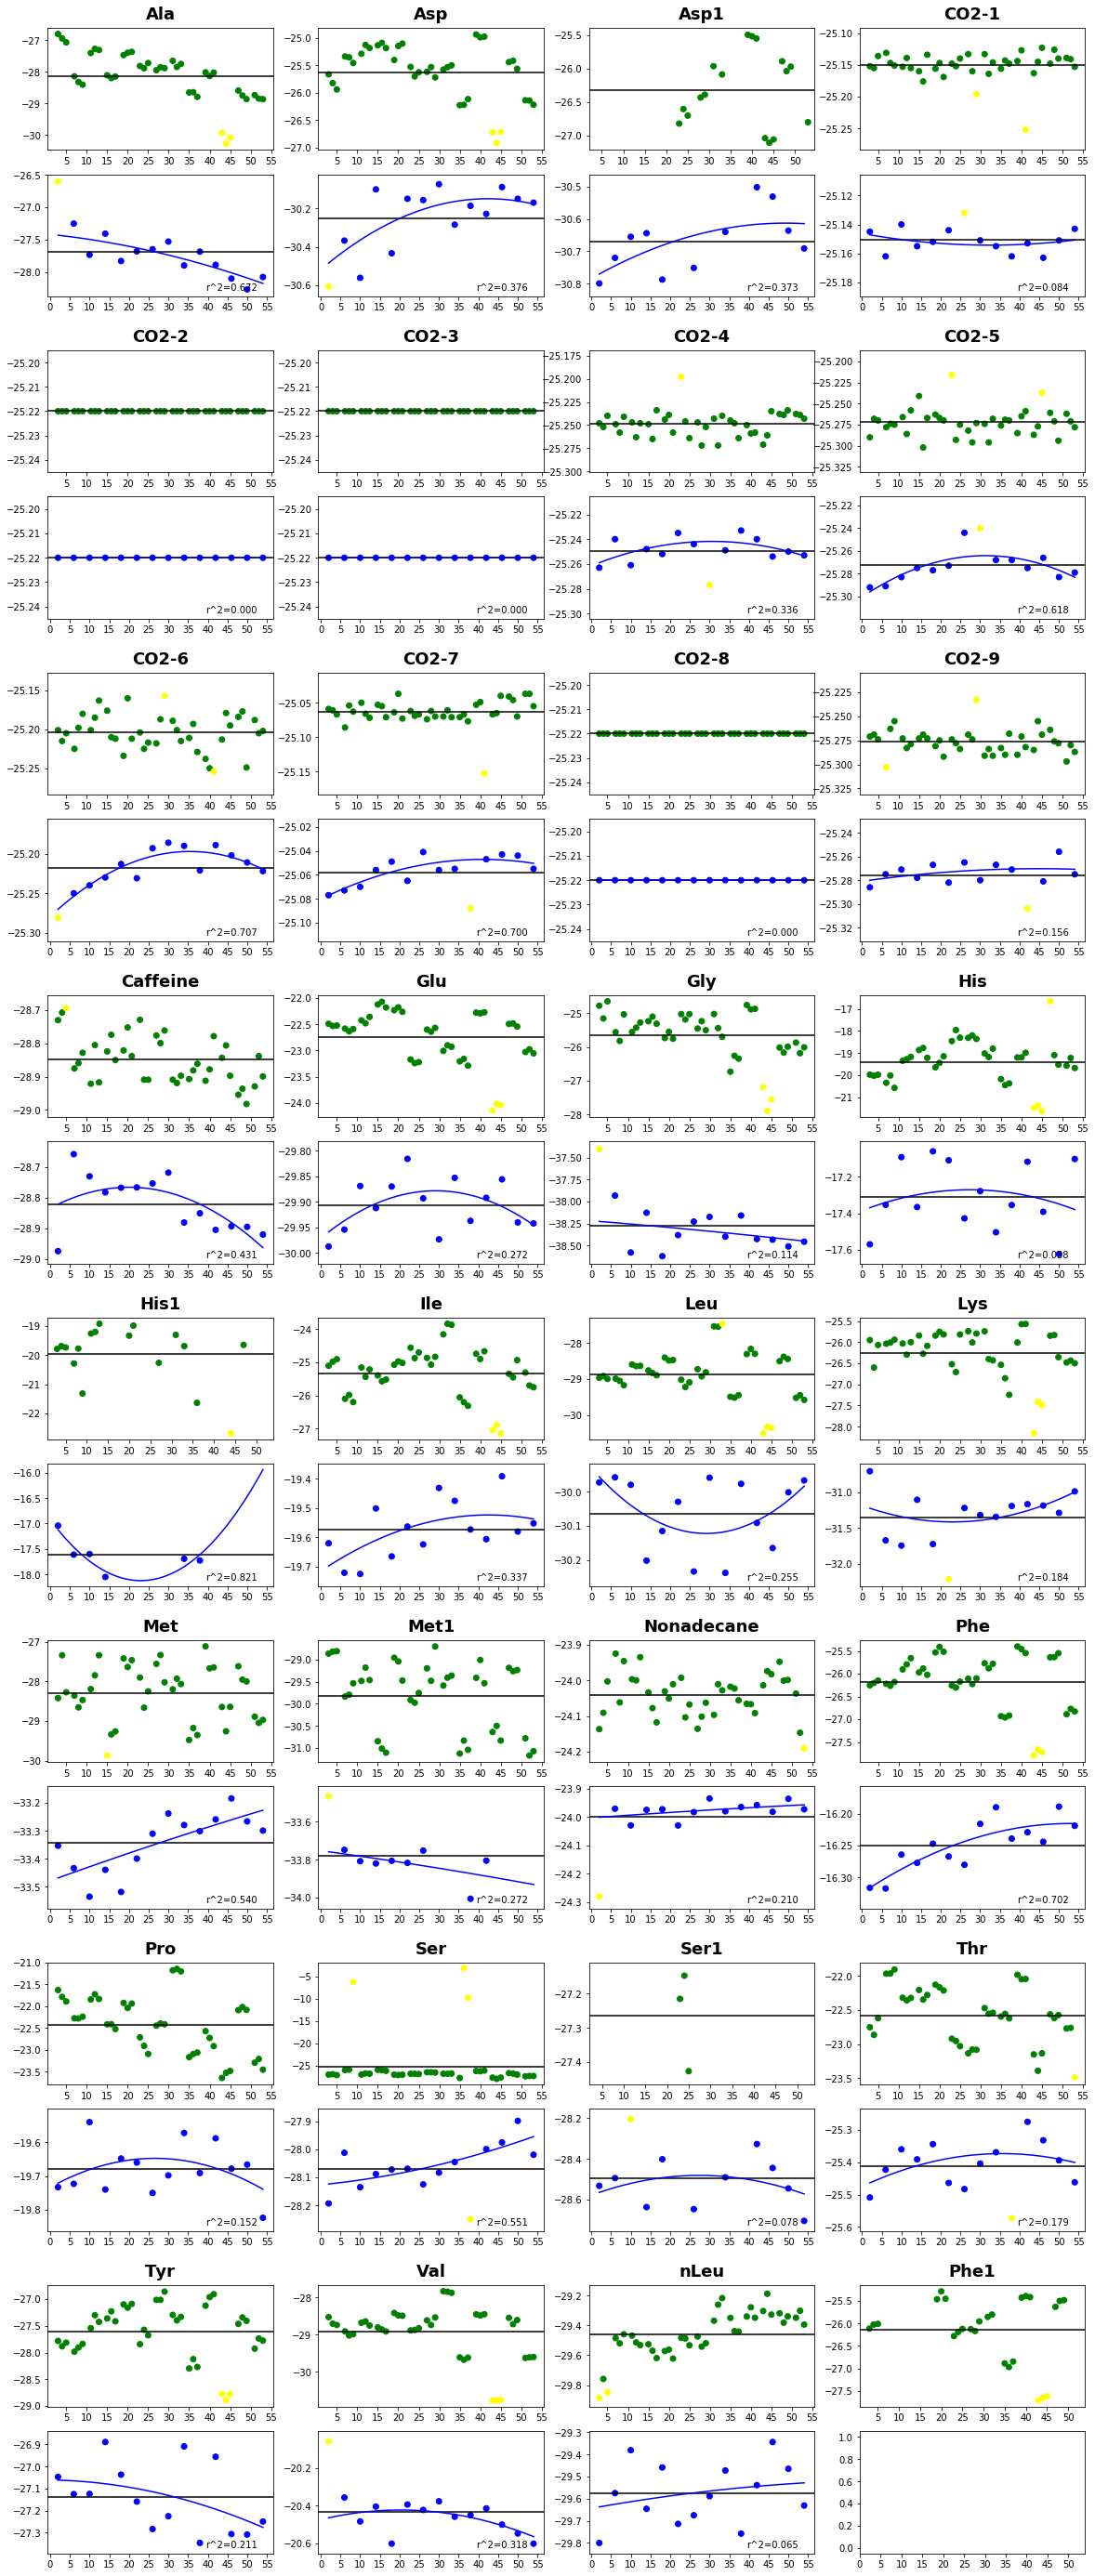

In [15]:
compounds = _all.drop(['Identifier 1', 'Identifier 2'], axis=1).columns

gW = 4
gH = math.ceil(len(compounds) / gW)

fig = plt.figure(figsize=(20, 50))

display(type(plt))

gs = gridspec.GridSpec(gH, gW) #32 samples, will have to fix later.

for idx, compound in enumerate(compounds):
    i = idx % gW
    j = math.floor(idx / gW)
    
    gsx = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[j, i])
    ax1 = fig.add_subplot(gsx[0, 0])
    ax2 = fig.add_subplot(gsx[1, 0])
    
    plotCompoundTimeSeries(_all[_all['Identifier 1'] != 'AA std'], compound, 'Green', 'Yellow', ax1)
    plotCompoundTimeSeries(_all[_all['Identifier 1'] == 'AA std'], compound, 'Blue', 'Yellow', ax2)
    
    displayTrendLine(_all[_all['Identifier 1'] == 'AA std'], compound, 'Blue', ax2)
    
    bbox = gs[j,i].get_position(figure=fig).get_points()
    xpos = (bbox[0][0] + bbox[1][0]) / 2
    
    t = fig.text(x=xpos, y=bbox[1][1] + 0.0025, s=str(compound), fontweight='bold', fontsize=18)
    
    r = fig.canvas.get_renderer()
    bb = t.get_window_extent(renderer=r)
    tt = fig.transFigure.inverted().transform((bb.width, bb.height))
    
    t.set_x(t.get_position()[0] - (tt[0] / 2))

    fig.add_subplot(gsx[1, 0])


plt.savefig('hello.png')
plt.show()

## lifetime trends

In [16]:
#do trends for lifetime!
for filename in glob.glob(file_Path + "/*.xls"):
    path = os.path.join(os.getcwd(), filename)
    df_all = pd.read_excel(path)
    
    all_compare = pd.concat([generateChem(df2) for _, df2 in df.groupby(['Identifier 1', 'Identifier 2'])])
    all_compare = _all.sort_index()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


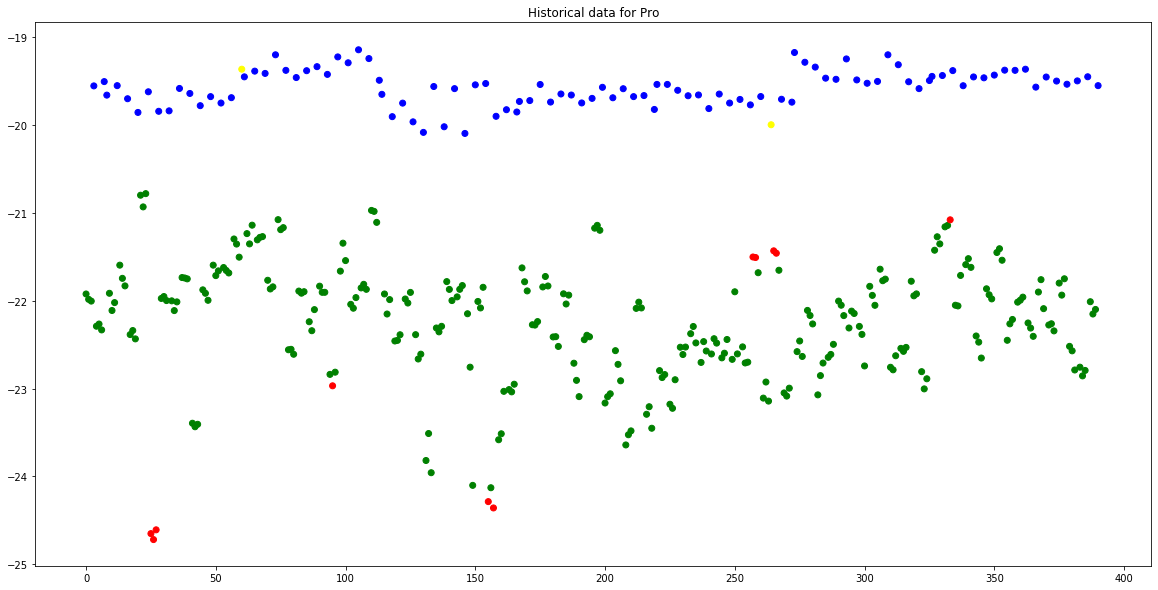

In [17]:
compound='Pro'

datePaths = []
for filename in glob.glob(file_Path + "/*.xls"):
    path = os.path.join(os.getcwd(), filename)
    datePaths.append(path)
    
datePaths.sort(key=lambda date: datetime.strptime(date.split('/')[-1].split('.')[0].upper().replace("SEPT", "SEP"), "%d%b%y"))

plt.figure(figsize=(20,10))
last = 0

for path in datePaths:
    df_all = pd.read_excel(path)
    
    all_compare = pd.concat([generateChem(df2) for _, df2 in df_all.groupby(['Identifier 1', 'Identifier 2'])])
    all_compare = all_compare.sort_index()
    
    def colorSTD(x):
        if x == 'AA std':
            return 'Blue'
        else:
            return 'Green'
        
    def colorSTD2(x):
        if x['Identifier 1'] == 'AA std':
            if x[compound] > upper_std or x[compound] < lower_std:
                return 'Yellow'
            else:
                return 'Blue'
        else:
            if x[compound] > upper or x[compound] < lower:
                return 'Red'
            else:   
                return 'Green'
        return

    
    upper, lower = outlier(all_compare[all_compare['Identifier 1'] != 'AA std'][compound])
    upper_std, lower_std = outlier(all_compare[all_compare['Identifier 1'] == 'AA std'][compound])
    
    colors = [colorSTD2(x) for _, x in all_compare.iterrows()]
    
    plt.scatter(list(range(last, len(all_compare.index) + last)), all_compare[compound], c=colors)
    last += len(all_compare.index)

plt.title("Historical data for " + compound)
plt.show()

## histograms for compounds in IS

In [18]:
def iqr(x):
    q75, q25 = np.percentile(x, [75 ,25])
    iqr = q75 - q25
    return iqr
    
#use Freedman-Diaconis rule to decide bin size
def binSize(data):
    bw = 2 * iqr(data) / (len(data) ** 1/3)
    if bw == 0:
        return 1
    bins = math.ceil((data.max() - data.min()) / bw)
    return bins

#return outliers as numpy list
def find_outliers(data, compound):
    upper, lower = outlier(data[compound])
    outl = data[~data[compound].between(lower, upper)][['Identifier 1', 'Identifier 2', compound]]
    
    if len(outl) == 0:
        outl = None
        
    return outl

#return outliers as list of boolean
def find_outliers_boolean(data):
    upper, lower = outlier(data)
    outl = ~data.between(lower, upper)
        
    return outl

#generate histogram for axis
def generate_hist(ax, data):
    binsize = binSize(data)
    ax.hist(data, bins=binsize, color='lightblue')
    ax.vlines(np.mean(data), *ax.get_ylim())
    
    ht = ax.transLimits.inverted().transform((1,1))[1]
    boxWidth = outlier(data)[0] - outlier(data)[1]
    aa_patch = Rectangle((outlier(data)[1],0), width=boxWidth, height=ht, color='lightgreen', alpha=0.5)
    ax.add_patch(aa_patch)    
    
    ax.vlines(outlier(data), *ax.get_ylim(), linestyle="dotted")
    
    infoSummery = "mean: %f, sd: %f" % (np.mean(data), np.std(data))
    ax.text(0.0, -0.12, s=infoSummery, transform=ax.transAxes, fontsize=16)
    
    return

#show mean, stdev, and outliers (+/- 2 stdev from mean)
def generate_summery(data, compound):
    display("STDEV for %s: %f" % (compound, np.std(data[compound])))
    display("Mean for %s: %f" % (compound, np.mean(data[compound])))
    outl = find_outliers(data, compound)
    if outl is not None:
        display("Outliers for %s" % (compound))
        display(outl)
    
    return

def generate_summery_2(data, compound, select):
    work = data[compound]
    
    display("STDEV for %s: %f" % (compound, np.std(work)))
    display("Mean for %s: %f" % (compound, np.mean(work)))
    outl = data[find_outliers_boolean(work)][select].dropna()
    if len(outl) != 0:
        display("Outliers for %s" % (compound))
        display(outl)
    
    return
    

#generate std and test histograms for compound in and out of AA std
def summery(data, compound):
    std_raw = data[data['Identifier 1'] == 'AA std']
    test_raw = data[data['Identifier 1'] != 'AA std']
    
    std = std_raw[compound]
    test = test_raw[compound]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    
    generate_hist(ax1, std)
    generate_hist(ax2, test)
    
    ax1.title.set_text("AA Standard " + compound)
    ax2.title.set_text("Test " + compound)
    
    plt.show()
    
    display("AA STD Summery-----------------------------")
    generate_summery(std_raw, compound)
    
    display("Test Summery-------------------------------")
    generate_summery(test_raw, compound)
    
    return

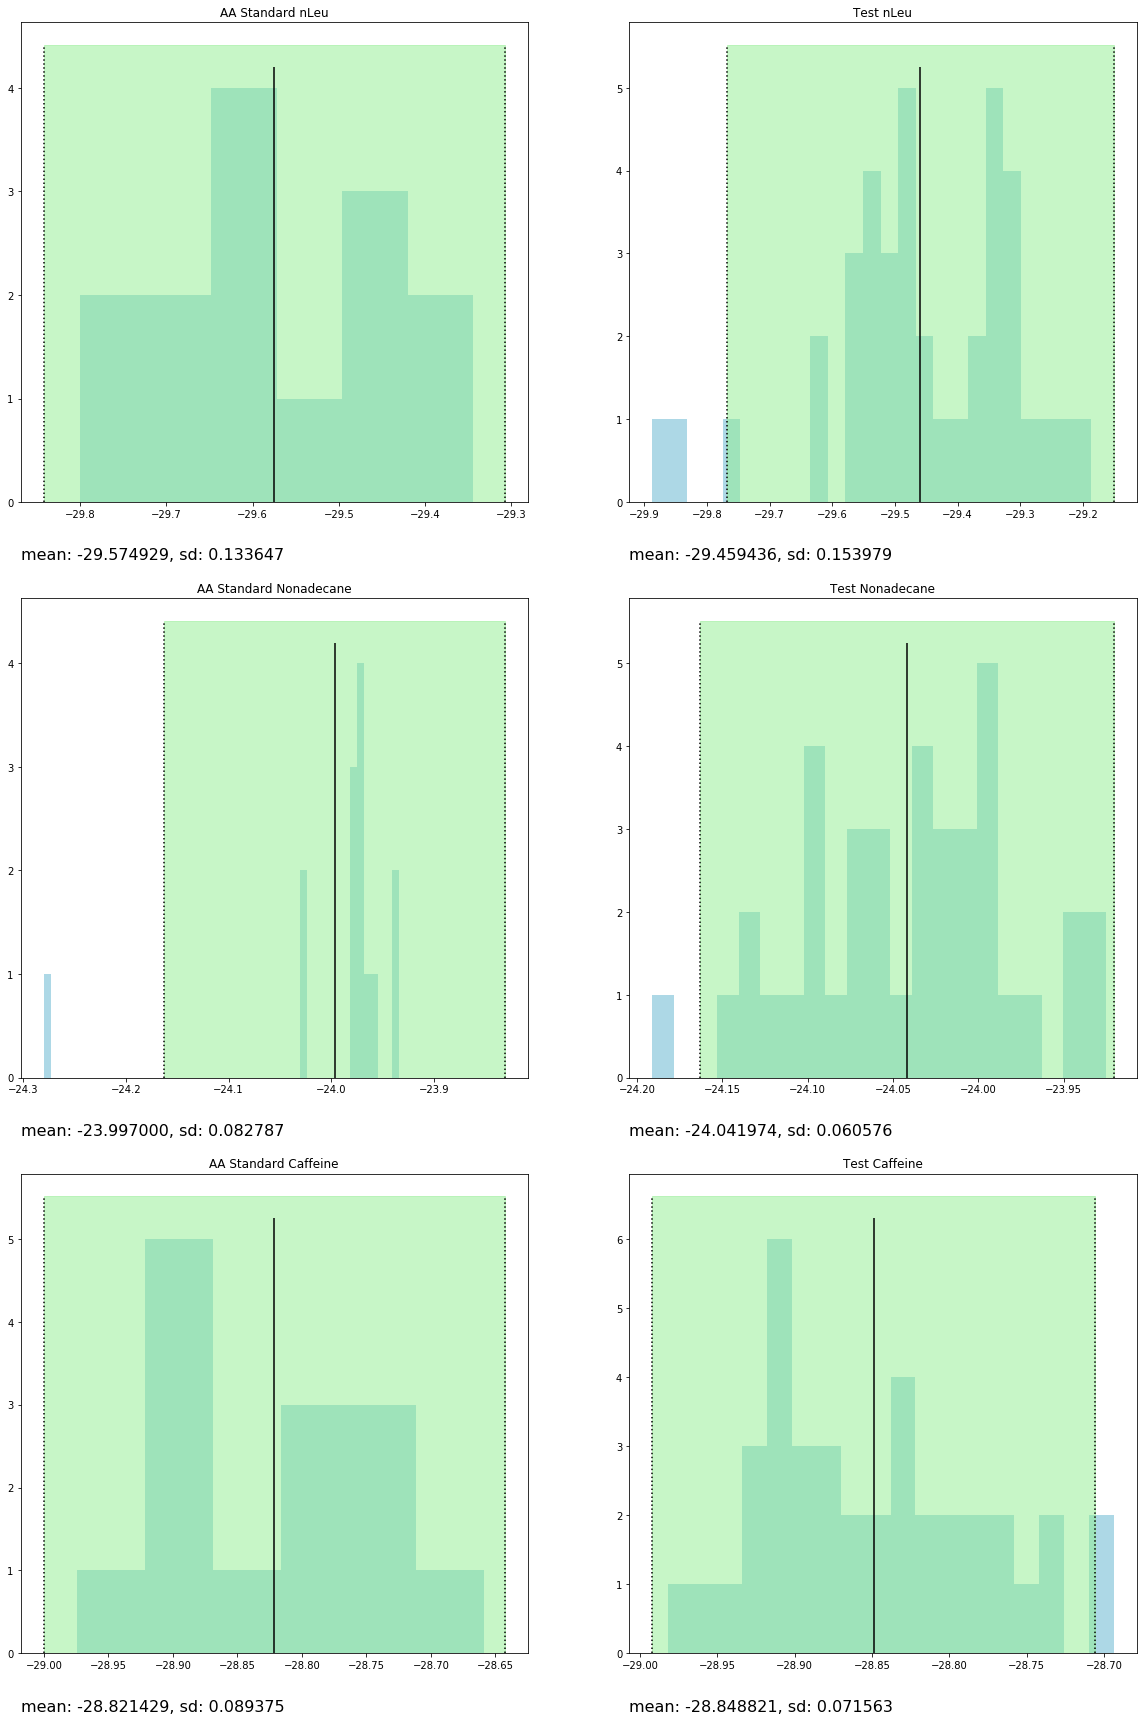

In [19]:
#calculate summery for all compounds in internal standard
std_raw = _all[_all['Identifier 1'] == 'AA std']
test_raw = _all[_all['Identifier 1'] != 'AA std']

fig, ax = plt.subplots(len(_is.index), 2, figsize=(20,30))
    
for idx, compound in enumerate(_is.index):    
    std = std_raw[compound]
    test = test_raw[compound]
    
    generate_hist(ax[idx, 0], std)
    generate_hist(ax[idx, 1], test)
    
    ax[idx, 0].title.set_text("AA Standard " + compound)
    ax[idx, 1].title.set_text("Test " + compound)
    
    #display("AA STD Summery-----------------------------")
    #generate_summery(std_raw, compound)
    
    #display("Test Summery-------------------------------")
    #generate_summery(test_raw, compound)
    
plt.show()

In [20]:
#helper function
def outl_array(data, compounds):
    final = []

    for compound in compounds:
        find = data[compound]
        outl = find[find_outliers_boolean(find)].dropna()
        for idx, value in outl.items():
            final.append([compound, idx, value])
    
    return final

In [21]:
#outl for std_raw

final = []

for compound in _is.index:
    std = std_raw[compound]
    outl = std[find_outliers_boolean(std)].dropna()
    for idx, value in outl.items():
        final.append([compound, idx, value])

display(final)

display(outl_array(std_raw, _is.index))

[['Nonadecane', 2, -24.28]]

[['Nonadecane', 2, -24.28]]

In [22]:
#outl for final

final = []

for compound in _is.index:
    std = test_raw[compound]
    outl = std[find_outliers_boolean(std)].dropna()
    for idx, value in outl.items():
        final.append([compound, idx, value])

display(final)

display(outl_array(test_raw, _is.index))

[['nLeu', 3, -29.887],
 ['nLeu', 5, -29.849],
 ['Nonadecane', 53, -24.191],
 ['Caffeine', 5, -28.694]]

[['nLeu', 3, -29.887],
 ['nLeu', 5, -29.849],
 ['Nonadecane', 53, -24.191],
 ['Caffeine', 5, -28.694]]

## histograms for compounds in AA samples

'--------------------------------------'

'STDEV for Ala: 0.401611'

'Mean for Ala: -27.686429'

'Outliers for Ala'

,Identifier 1,Identifier 2,Ala
Row,,,
2,AA std,1,-26.597


'--------------------------------------'

'STDEV for Asp: 0.167347'

'Mean for Asp: -30.253500'

'Outliers for Asp'

,Identifier 1,Identifier 2,Asp
Row,,,
2,AA std,1,-30.606


'--------------------------------------'

'STDEV for Asp1: 0.090612'

'Mean for Asp1: -30.668727'

'--------------------------------------'

'STDEV for CO2-1: 0.008666'

'Mean for CO2-1: -25.150571'

'Outliers for CO2-1'

,Identifier 1,Identifier 2,CO2-1
Row,,,
26,AA std,7,-25.132


'--------------------------------------'

'STDEV for CO2-2: 0.000000'

'Mean for CO2-2: -25.220000'

'--------------------------------------'

'STDEV for CO2-3: 0.000000'

'Mean for CO2-3: -25.220000'

'--------------------------------------'

'STDEV for CO2-4: 0.011348'

'Mean for CO2-4: -25.249929'

'Outliers for CO2-4'

,Identifier 1,Identifier 2,CO2-4
Row,,,
30,AA std,8,-25.277


'--------------------------------------'

'STDEV for CO2-5: 0.014564'

'Mean for CO2-5: -25.272429'

'Outliers for CO2-5'

,Identifier 1,Identifier 2,CO2-5
Row,,,
30,AA std,8,-25.24


'--------------------------------------'

'STDEV for CO2-6: 0.025933'

'Mean for CO2-6: -25.218500'

'Outliers for CO2-6'

,Identifier 1,Identifier 2,CO2-6
Row,,,
2,AA std,1,-25.281


'--------------------------------------'

'STDEV for CO2-7: 0.013663'

'Mean for CO2-7: -25.058500'

'Outliers for CO2-7'

,Identifier 1,Identifier 2,CO2-7
Row,,,
38,AA std,10,-25.088


'--------------------------------------'

'STDEV for CO2-8: 0.000000'

'Mean for CO2-8: -25.220000'

'--------------------------------------'

'STDEV for CO2-9: 0.011011'

'Mean for CO2-9: -25.275571'

'Outliers for CO2-9'

,Identifier 1,Identifier 2,CO2-9
Row,,,
42,AA std,11,-25.304


'--------------------------------------'

'STDEV for Caffeine: 0.089375'

'Mean for Caffeine: -28.821429'

'--------------------------------------'

'STDEV for Glu: 0.048723'

'Mean for Glu: -29.906714'

'--------------------------------------'

'STDEV for Gly: 0.305112'

'Mean for Gly: -38.274071'

'Outliers for Gly'

,Identifier 1,Identifier 2,Gly
Row,,,
2,AA std,1,-37.403


'--------------------------------------'

'STDEV for His: 0.181402'

'Mean for His: -17.310143'

'--------------------------------------'

'STDEV for His1: 0.299791'

'Mean for His1: -17.621000'

'--------------------------------------'

'STDEV for Ile: 0.095631'

'Mean for Ile: -19.573357'

'--------------------------------------'

'STDEV for Leu: 0.104422'

'Mean for Leu: -30.063071'

'--------------------------------------'

'STDEV for Lys: 0.364441'

'Mean for Lys: -31.348929'

'Outliers for Lys'

,Identifier 1,Identifier 2,Lys
Row,,,
22,AA std,6,-32.214


'--------------------------------------'

'STDEV for Met: 0.102193'

'Mean for Met: -33.343786'

'--------------------------------------'

'STDEV for Met1: 0.131878'

'Mean for Met1: -33.780889'

'Outliers for Met1'

,Identifier 1,Identifier 2,Met1
Row,,,
2,AA std,1,-33.466


'--------------------------------------'

'STDEV for Nonadecane: 0.082787'

'Mean for Nonadecane: -23.997000'

'Outliers for Nonadecane'

,Identifier 1,Identifier 2,Nonadecane
Row,,,
2,AA std,1,-24.28


'--------------------------------------'

'STDEV for Phe: 0.038731'

'Mean for Phe: -16.249571'

'--------------------------------------'

'STDEV for Pro: 0.073526'

'Mean for Pro: -19.679357'

'--------------------------------------'

'STDEV for Ser: 0.086658'

'Mean for Ser: -28.068714'

'Outliers for Ser'

,Identifier 1,Identifier 2,Ser
Row,,,
38,AA std,10,-28.249


'--------------------------------------'

'STDEV for Ser1: 0.140287'

'Mean for Ser1: -28.494091'

'Outliers for Ser1'

,Identifier 1,Identifier 2,Ser1
Row,,,
10,AA std,3,-28.204


'--------------------------------------'

'STDEV for Thr: 0.075996'

'Mean for Thr: -25.413071'

'Outliers for Thr'

,Identifier 1,Identifier 2,Thr
Row,,,
38,AA std,10,-25.573


'--------------------------------------'

'STDEV for Tyr: 0.148345'

'Mean for Tyr: -27.140214'

'--------------------------------------'

'STDEV for Val: 0.128403'

'Mean for Val: -20.434000'

'Outliers for Val'

,Identifier 1,Identifier 2,Val
Row,,,
2,AA std,1,-20.058


'--------------------------------------'

'STDEV for nLeu: 0.133647'

'Mean for nLeu: -29.574929'

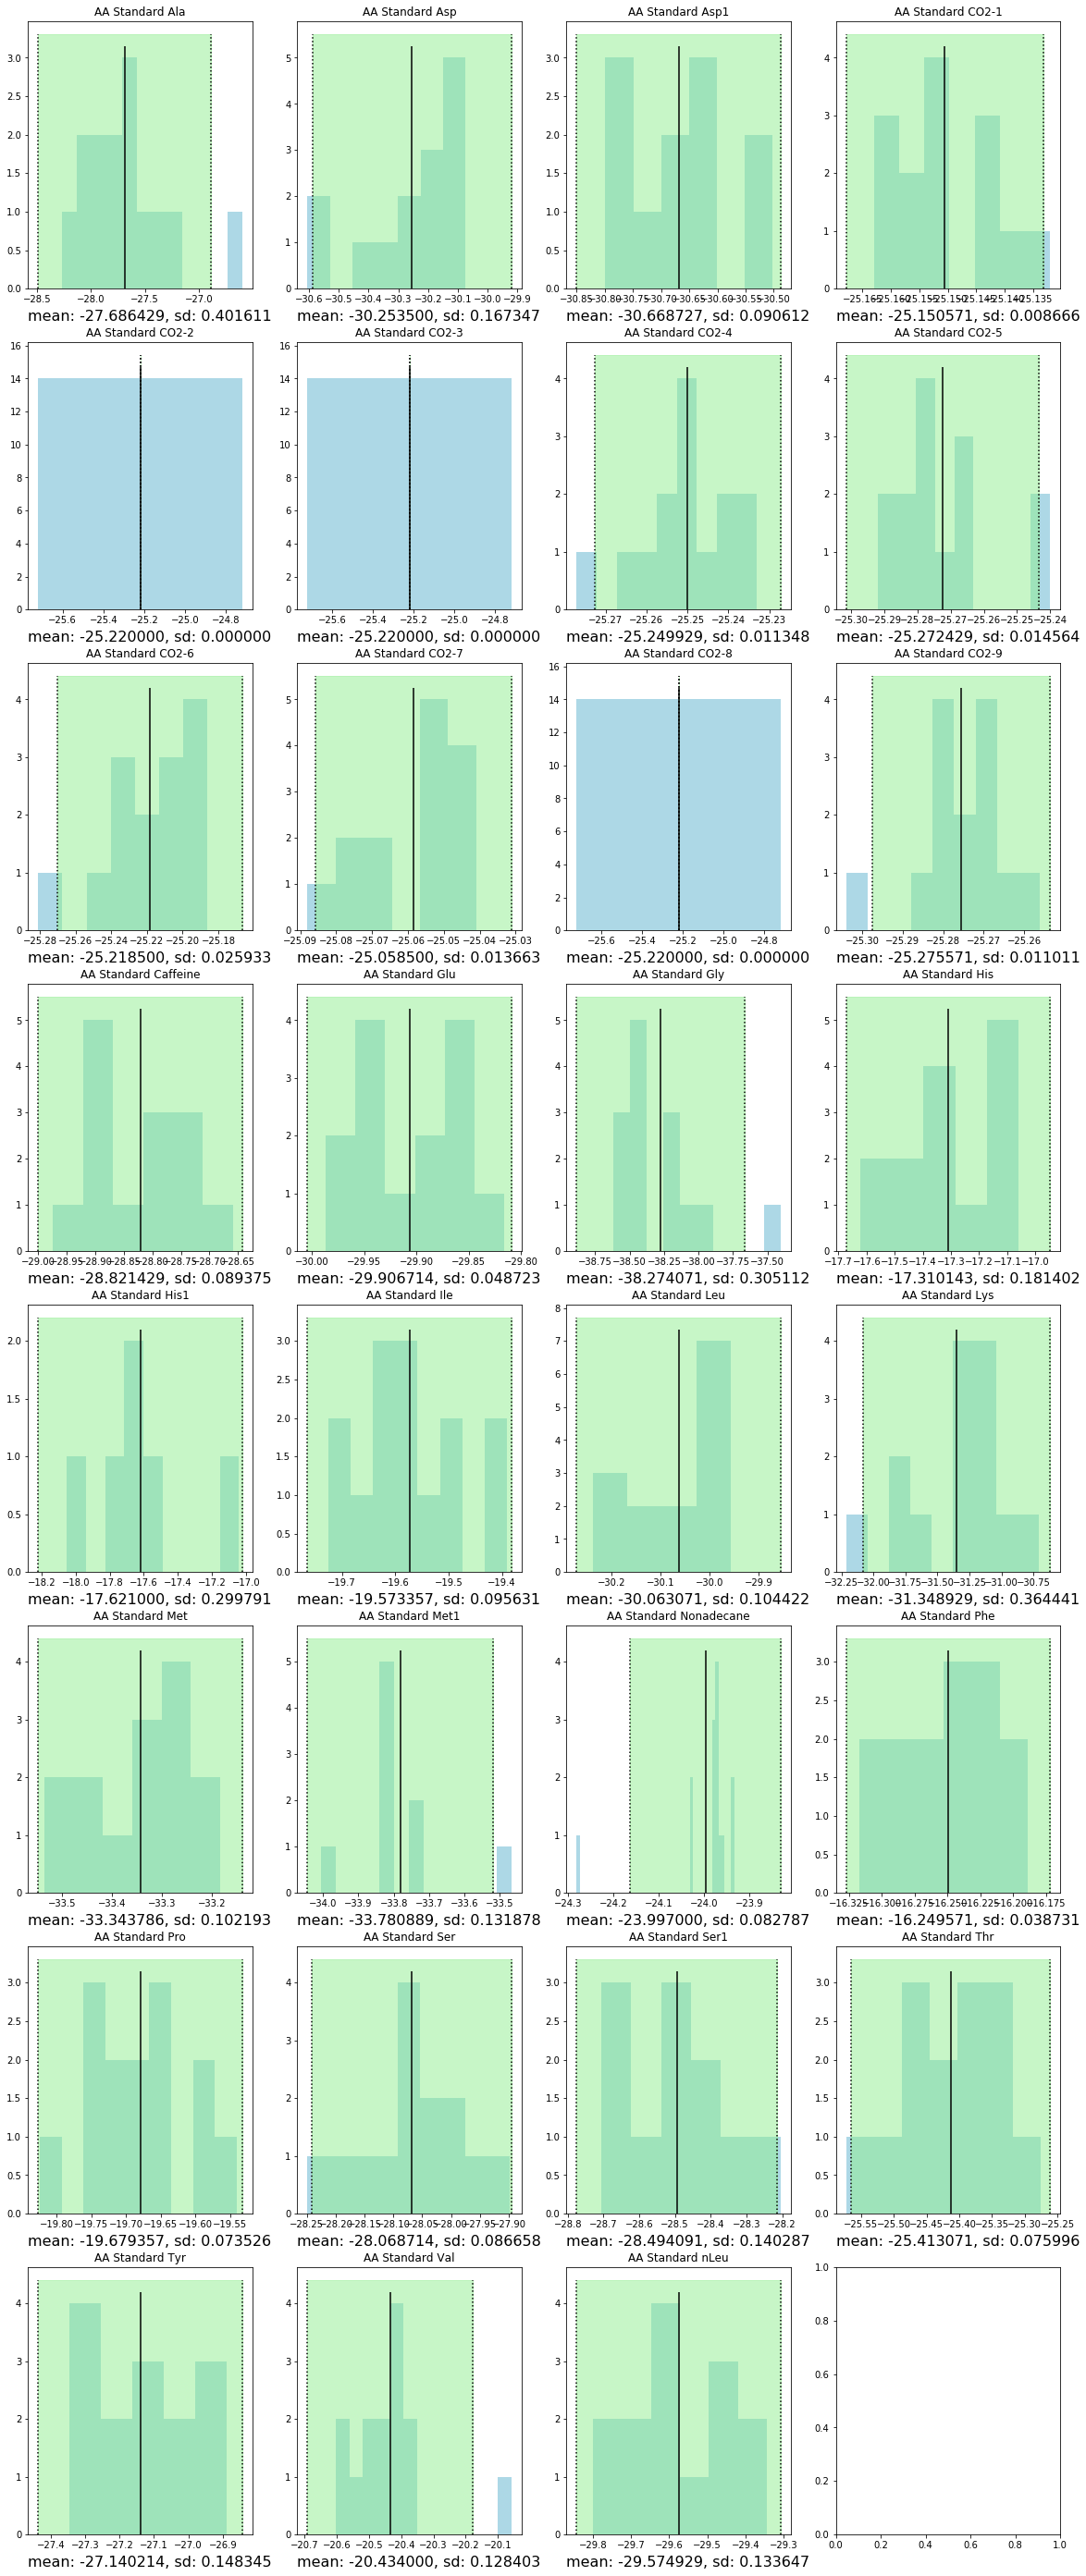

In [23]:
gW = 4
gH = math.ceil(len(aa.index) / gW)

fig, ax = plt.subplots(gH, gW, figsize=(20,50))

for idx, compound in enumerate(aa.index):
    i = idx % gW
    j = math.floor(idx / gW)
    
    std_raw = _all[_all['Identifier 1'] == 'AA std']
    std = std_raw[compound]
    std = std.dropna()
    
    generate_hist(ax[j, i], std)
    
    ax[j, i].title.set_text("AA Standard " + compound)
    
    display("--------------------------------------")
    generate_summery_2(std_raw, compound, ['Identifier 1', 'Identifier 2', compound])
    
plt.show()

In [24]:
#condensed summery for above.

final = []
std_raw = _all[_all['Identifier 1'] == 'AA std']

for compound in aa.index:
    std = std_raw[compound]
    outl = std[find_outliers_boolean(std)].dropna()
    for idx, value in outl.items():
        final.append([compound, idx, value])

display(final)

display(outl_array(std_raw, aa.index))

[['Ala', 2, -26.597],
 ['Asp', 2, -30.606],
 ['CO2-1', 26, -25.132],
 ['CO2-4', 30, -25.277],
 ['CO2-5', 30, -25.24],
 ['CO2-6', 2, -25.281],
 ['CO2-7', 38, -25.088],
 ['CO2-9', 42, -25.304],
 ['Gly', 2, -37.403],
 ['Lys', 22, -32.214],
 ['Met1', 2, -33.466],
 ['Nonadecane', 2, -24.28],
 ['Ser', 38, -28.249],
 ['Ser1', 10, -28.204],
 ['Thr', 38, -25.573],
 ['Val', 2, -20.058]]

[['Ala', 2, -26.597],
 ['Asp', 2, -30.606],
 ['CO2-1', 26, -25.132],
 ['CO2-4', 30, -25.277],
 ['CO2-5', 30, -25.24],
 ['CO2-6', 2, -25.281],
 ['CO2-7', 38, -25.088],
 ['CO2-9', 42, -25.304],
 ['Gly', 2, -37.403],
 ['Lys', 22, -32.214],
 ['Met1', 2, -33.466],
 ['Nonadecane', 2, -24.28],
 ['Ser', 38, -28.249],
 ['Ser1', 10, -28.204],
 ['Thr', 38, -25.573],
 ['Val', 2, -20.058]]

## standard deviations of triplicate runs

In [25]:
#write custom std for double values if not triplicate
#do _all[_all['Identifier 1'] == sample].apply(lambda x: my_std(x))
def my_std(data):
    if len(data) == 3:
        return np.std(data)
    else:
        return data.iloc[0] - data.iloc[1]
        
    

compounds = _all.drop(['Identifier 1', 'Identifier 2'], axis=1).columns

samples = _all['Identifier 1'].unique()
samples = np.delete(samples, np.where(samples == 'AA std'))
    
all_sd = [my_std(_all[_all['Identifier 1'] == sample]) for sample in samples]
all_sd = pd.concat(all_sd, keys=samples, axis=1).T
all_sd = all_sd.drop('Identifier 2', axis=1)

In [26]:
outfast = find_outliers_boolean(all_sd['Ala'])

#display(all_sd.index[all_sd.apply(lambda x: find_outliers_boolean(x))])
of = pd.DataFrame([all_sd[find_outliers_boolean(all_sd[x])][x] for x in all_sd.columns])

for col in of.columns:
    this = of[col].dropna()
    print(this.keys)
    print(this.name)
    print(this.tolist())

<bound method Series.keys of Ala    0.139486
Name: SB39 T2 S, dtype: float64>
SB39 T2 S
[0.13948556277343666]
<bound method Series.keys of Asp    0.132565
Name: SB65 T2 S, dtype: float64>
SB65 T2 S
[0.13256528789828698]
<bound method Series.keys of Met    0.479184
Name: SB15 T2 S, dtype: float64>
SB15 T2 S
[0.47918426054656277]
<bound method Series.keys of CO2-9    0.020997
His1     0.642497
Ser      9.271179
Name: SB77 T2 S, dtype: float64>
SB77 T2 S
[0.020997354330698555, 0.6424966925984917, 9.271179189054408]
<bound method Series.keys of Phe    0.101009
Name: SB49 T2 S, dtype: float64>
SB49 T2 S
[0.10100935050226238]
<bound method Series.keys of Series([], Name: SB34 T2 S, dtype: float64)>
SB34 T2 S
[]
<bound method Series.keys of Ser    10.393949
Name: SB40 T2 S, dtype: float64>
SB40 T2 S
[10.393948955468701]
<bound method Series.keys of CO2-1    0.055355
CO2-7    0.048111
Name: SB54 T2 S, dtype: float64>
SB54 T2 S
[0.05535541727981312, 0.048110982807115905]
<bound method Series.ke

In [27]:
final = []

for col in all_sd.columns:
    outl = all_sd[find_outliers_boolean(all_sd[col])][col].dropna()
    for idx, value in outl.items():
        final.append([col, idx, value])

display(final)

display(outl_array(all_sd ,all_sd.columns))

[['Ala', 'SB39 T2 S', 0.13948556277343666],
 ['Asp', 'SB65 T2 S', 0.13256528789828698],
 ['CO2-1', 'SB54 T2 S', 0.05535541727981312],
 ['CO2-4', 'Check S', 0.02785677655436768],
 ['CO2-5', 'Check S', 0.03288701195845397],
 ['CO2-7', 'SB54 T2 S', 0.048110982807115905],
 ['CO2-9', 'SB77 T2 S', 0.020997354330698555],
 ['Caffeine', 'Check S', 0.08485281374238557],
 ['His', 'SB75 T2 S', 1.2670349464618393],
 ['His1', 'SB77 T2 S', 0.6424966925984917],
 ['Ile', 'SB75 T2 S', 0.22390523789218364],
 ['Met', 'SB15 T2 S', 0.47918426054656277],
 ['Met1', 'SB09 T2 S', 0.3215238024712247],
 ['Phe', 'SB49 T2 S', 0.10100935050226238],
 ['Pro', 'Check S', 0.15515225496982665],
 ['Ser', 'SB77 T2 S', 9.271179189054408],
 ['Ser', 'SB40 T2 S', 10.393948955468701],
 ['Thr', 'SB17 T2 S', 0.34132128884999496]]

[['Ala', 'SB39 T2 S', 0.13948556277343666],
 ['Asp', 'SB65 T2 S', 0.13256528789828698],
 ['CO2-1', 'SB54 T2 S', 0.05535541727981312],
 ['CO2-4', 'Check S', 0.02785677655436768],
 ['CO2-5', 'Check S', 0.03288701195845397],
 ['CO2-7', 'SB54 T2 S', 0.048110982807115905],
 ['CO2-9', 'SB77 T2 S', 0.020997354330698555],
 ['Caffeine', 'Check S', 0.08485281374238557],
 ['His', 'SB75 T2 S', 1.2670349464618393],
 ['His1', 'SB77 T2 S', 0.6424966925984917],
 ['Ile', 'SB75 T2 S', 0.22390523789218364],
 ['Met', 'SB15 T2 S', 0.47918426054656277],
 ['Met1', 'SB09 T2 S', 0.3215238024712247],
 ['Phe', 'SB49 T2 S', 0.10100935050226238],
 ['Pro', 'Check S', 0.15515225496982665],
 ['Ser', 'SB77 T2 S', 9.271179189054408],
 ['Ser', 'SB40 T2 S', 10.393948955468701],
 ['Thr', 'SB17 T2 S', 0.34132128884999496]]

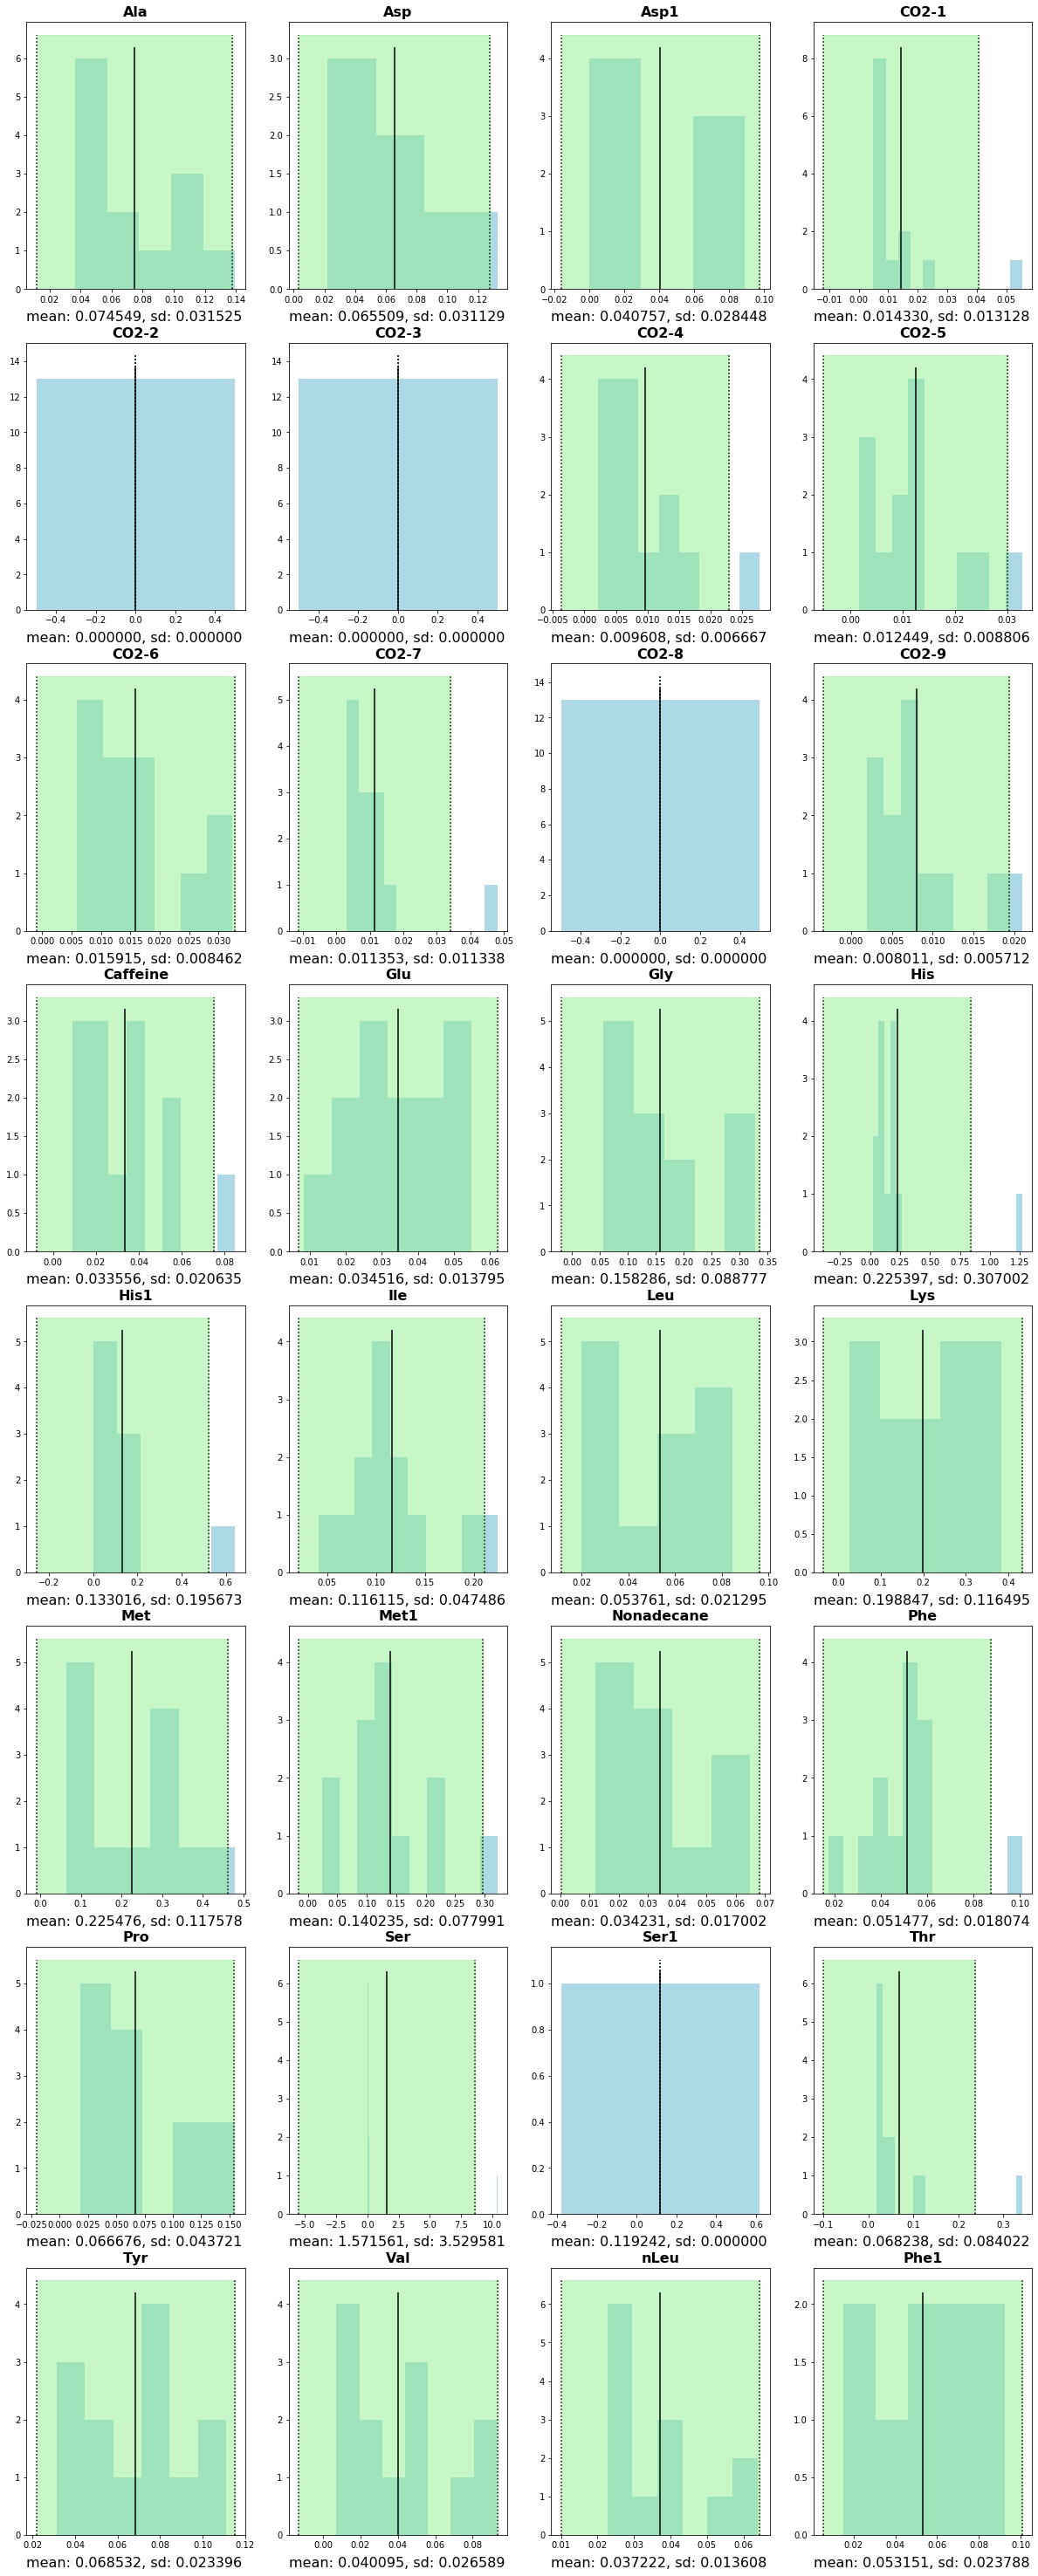

In [28]:
gW = 4
gH = math.ceil(len(all_sd.columns) / gW)


fig, ax = plt.subplots(gH, gW, figsize=(20,50))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

for idx, col in enumerate(all_sd.columns):
    i = idx % gW
    j = math.floor(idx / gW)
    
    generate_hist(ax[j, i], all_sd[col].dropna())
    
    ax[j, i].set_title(col, fontdict={'fontsize': 16, 'fontweight': 'bold'})
    
    #display("---------------------------------")
    #generate_summery_2(all_sd, col, compound)
    
#find outl for each column
    
plt.show()

## make triplicate dataframe

In [29]:
#get triplicate
def triplicate_norm():
    final = []
    out = _all['Identifier 1'].unique()
    out = np.delete(out, 0) #assumes aa std will always be at run 0...
    
    for sample in out:
        data = _all[_all['Identifier 1'] == sample]
        for compound in data.columns[2:]:
            alj = data[compound].values
            if not np.isnan(np.sum(alj)):
                final.append([data.index.values[0], sample, compound, alj[0], alj[1], alj[2], np.mean(alj), np.std(alj), (np.std(alj)/np.sqrt(len(alj)))])
                
    cNames = ['Row', 'Sample', 'AA', 'Inj_1', 'Inj_2', 'Inj_3', 'Mean', 'SD_inj', 'SE']
    
    return pd.DataFrame(data=final, columns=cNames)

tn = triplicate_norm()

tn

,Row,Sample,AA,Inj_1,Inj_2,Inj_3,Mean,SD_inj,SE
0,3,SB15 T2 S,Ala,-26.807,-26.947,-27.073,-26.942333,0.108644,0.062726
1,3,SB15 T2 S,Asp,-25.664,-25.823,-25.939,-25.808667,0.112725,0.065082
2,3,SB15 T2 S,CO2-1,-25.152,-25.155,-25.136,-25.147667,0.008340,0.004815
3,3,SB15 T2 S,CO2-2,-25.220,-25.220,-25.220,-25.220000,0.000000,0.000000
4,3,SB15 T2 S,CO2-3,-25.220,-25.220,-25.220,-25.220000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
375,51,SB17 T2 S,Ser,-27.353,-27.274,-27.280,-27.302333,0.035910,0.020733
376,51,SB17 T2 S,Thr,-22.771,-22.761,-23.490,-23.007333,0.341321,0.197062
377,51,SB17 T2 S,Tyr,-27.928,-27.736,-27.776,-27.813333,0.082710,0.047752
378,51,SB17 T2 S,Val,-29.626,-29.610,-29.601,-29.612333,0.010339,0.005969


In [30]:
#get triplicate for aa std only
_all[_all['Identifier 1'] == 'AA std']

,Identifier 1,Identifier 2,Ala,Asp,Asp1,CO2-1,CO2-2,CO2-3,CO2-4,CO2-5,...,Nonadecane,Phe,Pro,Ser,Ser1,Thr,Tyr,Val,nLeu,Phe1
Row,,,,,,,,,,,,,,,,,,,,,
2,AA std,1,-26.597,-30.606,-30.799,-25.145,-25.22,-25.22,-25.263,-25.292,...,-24.280,-16.316,-19.733,-28.193,-28.533,-25.509,-27.047,-20.058,-29.800,NaN
6,AA std,2,-27.252,-30.367,-30.720,-25.162,-25.22,-25.22,-25.240,-25.291,...,-23.970,-16.317,-19.723,-28.012,-28.495,-25.423,-27.125,-20.357,-29.575,NaN
10,AA std,3,-27.735,-30.561,-30.655,-25.140,-25.22,-25.22,-25.261,-25.283,...,-24.029,-16.264,-19.540,-28.135,-28.204,-25.360,-27.124,-20.484,-29.381,NaN
14,AA std,4,-27.407,-30.100,-30.644,-25.155,-25.22,-25.22,-25.248,-25.275,...,-23.974,-16.277,-19.740,-28.088,-28.638,-25.391,-26.889,-20.405,-29.646,NaN
18,AA std,5,-27.831,-30.433,-30.787,-25.152,-25.22,-25.22,-25.252,-25.277,...,-23.972,-16.247,-19.648,-28.072,-28.402,-25.344,-27.037,-20.602,-29.459,NaN
22,AA std,6,-27.681,-30.149,NaN,-25.144,-25.22,-25.22,-25.235,-25.273,...,-24.029,-16.267,-19.660,-28.069,NaN,-25.464,-27.159,-20.394,-29.714,NaN
26,AA std,7,-27.649,-30.156,-30.751,-25.132,-25.22,-25.22,-25.244,-25.244,...,-23.982,-16.280,-19.750,-28.125,-28.648,-25.483,-27.283,-20.423,-29.675,NaN
30,AA std,8,-27.530,-30.073,NaN,-25.151,-25.22,-25.22,-25.277,-25.240,...,-23.934,-16.216,-19.698,-28.083,NaN,-25.404,-27.225,-20.377,-29.589,NaN
34,AA std,9,-27.900,-30.284,-30.640,-25.155,-25.22,-25.22,-25.249,-25.268,...,-23.979,-16.190,-19.572,-28.045,-28.491,-25.369,-26.909,-20.459,-29.473,NaN


## Process corrections

In [31]:
file_Name = "AA_STD_d13C_d15N_Dec2019.xlsx"
file_Path = "/Users/quinnvinlove/Documents/sugarsBio/"

standard = pd.read_excel(file_Path + file_Name)

display(standard)

,Compound,Standard,d13C,d15N
0,Ala,AA1,-19.166895,-4.509684
1,Ala,AA2,-25.069272,-8.175355
2,Asp,AA2,-23.666556,-5.261537
3,Asp,AA1,-27.287541,-1.420001
4,Glu,AA2,-28.699079,-4.442138
5,Glu,AA1,-28.893942,-3.505599
6,Glu,SN,36.834305,47.670800
7,Gly,AA2,-32.001644,1.660896
8,Gly,AA1,-42.268788,3.532704
9,Gly,SN,-40.577522,2.117807


## do triplicate mean correction

In [47]:
"""
	0:sample mean
	1:std before
	2:std after
	3:mean of before/after
"""

#todo: make bail case in switch just in case
#check work

#add before, after, bamean to this
def triplicate(sw, exclusions = []):
    #set p^-1
    p_C = 0.5

    #set standard name
    s_name = 'AA1'
    corr = standard[standard.Standard == s_name]
    
    allQC = _all[_all['Identifier 1'] == 'AA std']

    for compound in corr.Compound:
        der_sample_mean = tn[tn.AA == compound].Mean
        
        indicies = tn[tn.AA == compound].Row.values
        
        before = [allQC[allQC.index < x].iloc[0][compound] for x in indicies]
        after = [allQC[allQC.index > x].iloc[0][compound] for x in indicies]
        
        if sw == 0: der_standard = np.mean(allQC[compound])  
        elif sw == 1: der_standard = before
        elif sw == 2: der_standard = after
        elif sw == 3: der_standard = np.mean([before, after])
        else: return
            
        d13C = corr[corr.Compound == compound].d13C.values[0]

        corrected = (der_sample_mean - der_standard) * p_C + d13C

        current_sample = tn[(tn.AA == compound) & (tn.Sample != 'AA std')].Sample

        for id1 in current_sample:
            #danger: will modefy seed data
            df.loc[(df['Identifier 1'] == id1) & (df.Component == compound), 'd 13C/12C'] = corrected
    return

triplicate(0)

[-26.597,
 -26.597,
 -26.597,
 -26.597,
 -26.597,
 -26.597,
 -26.597,
 -26.597,
 -26.597,
 -26.597,
 -26.597,
 -26.597,
 -26.597]

[-30.606,
 -30.606,
 -30.606,
 -30.606,
 -30.606,
 -30.606,
 -30.606,
 -30.606,
 -30.606,
 -30.606,
 -30.606,
 -30.606,
 -30.606]

[-29.987,
 -29.987,
 -29.987,
 -29.987,
 -29.987,
 -29.987,
 -29.987,
 -29.987,
 -29.987,
 -29.987,
 -29.987,
 -29.987,
 -29.987]

[-37.403,
 -37.403,
 -37.403,
 -37.403,
 -37.403,
 -37.403,
 -37.403,
 -37.403,
 -37.403,
 -37.403,
 -37.403,
 -37.403,
 -37.403]

[-17.569,
 -17.569,
 -17.569,
 -17.569,
 -17.569,
 -17.569,
 -17.569,
 -17.569,
 -17.569,
 -17.569,
 -17.569,
 -17.569,
 -17.569]

[-19.62,
 -19.62,
 -19.62,
 -19.62,
 -19.62,
 -19.62,
 -19.62,
 -19.62,
 -19.62,
 -19.62,
 -19.62,
 -19.62,
 -19.62]

[-29.972,
 -29.972,
 -29.972,
 -29.972,
 -29.972,
 -29.972,
 -29.972,
 -29.972,
 -29.972,
 -29.972,
 -29.972,
 -29.972,
 -29.972]

[-30.707,
 -30.707,
 -30.707,
 -30.707,
 -30.707,
 -30.707,
 -30.707,
 -30.707,
 -30.707,
 -30.707,
 -30.707,
 -30.707,
 -30.707]

[-33.353,
 -33.353,
 -33.353,
 -33.353,
 -33.353,
 -33.353,
 -33.353,
 -33.353,
 -33.353,
 -33.353,
 -33.353,
 -33.353,
 -33.353]

[-29.8,
 -29.8,
 -29.8,
 -29.8,
 -29.8,
 -29.8,
 -29.8,
 -29.8,
 -29.8,
 -29.8,
 -29.8,
 -29.8,
 -29.8]

[-16.316,
 -16.316,
 -16.316,
 -16.316,
 -16.316,
 -16.316,
 -16.316,
 -16.316,
 -16.316,
 -16.316,
 -16.316,
 -16.316,
 -16.316]

[-19.733,
 -19.733,
 -19.733,
 -19.733,
 -19.733,
 -19.733,
 -19.733,
 -19.733,
 -19.733,
 -19.733,
 -19.733,
 -19.733,
 -19.733]

[-28.193,
 -28.193,
 -28.193,
 -28.193,
 -28.193,
 -28.193,
 -28.193,
 -28.193,
 -28.193,
 -28.193,
 -28.193,
 -28.193,
 -28.193]

[-25.509,
 -25.509,
 -25.509,
 -25.509,
 -25.509,
 -25.509,
 -25.509,
 -25.509,
 -25.509,
 -25.509,
 -25.509,
 -25.509,
 -25.509]

[-27.047,
 -27.047,
 -27.047,
 -27.047,
 -27.047,
 -27.047,
 -27.047,
 -27.047,
 -27.047,
 -27.047,
 -27.047,
 -27.047,
 -27.047]

[-20.058,
 -20.058,
 -20.058,
 -20.058,
 -20.058,
 -20.058,
 -20.058,
 -20.058,
 -20.058,
 -20.058,
 -20.058,
 -20.058,
 -20.058]

In [44]:
#correct individuals

def triplicate2(sw, exclusions=[]):
    #set p^-1
    p_C = 0.5

    #set standard name
    s_name = 'AA1'
    corr = standard[standard.Standard == s_name]
    
    allQC = _all[_all['Identifier 1'] == 'AA std']
    
    for idx, row in tn.iterrows(): #could reduce this to map...
        samp = np.mean([row.Inj_1, row.Inj_2, row.Inj_3])
        
        before = allQC[allQC.index < row.Row].iloc[0][row.AA]
        after = allQC[allQC.index > row.Row].iloc[0][row.AA]
        bam = np.mean([before, after])
        
        if sw == 0: der_standard = np.mean(allQC[row.AA])
        elif sw == 1: der_standard = before
        elif sw == 2: der_standard = after
        elif sw == 3: der_standard = bam
        
        if len(corr[corr.Compound == row.AA]) > 0:
            d13C = corr[corr.Compound == row.AA].d13C.values[0]

            corrected = (samp - der_standard) * p_C + d13C

            #danger: below will modefy seed data
            df.loc[(df['Identifier 1'] == row.Sample) & (df.Component == row.AA), 'd 13C/12C'] = corrected
        
triplicate2(0)

-18.794847657469447

-25.065124096486805

-25.19908469610739

-35.56208565064955

-10.781422772134574

-13.951993306197929

-28.383146753355916

-25.554092950796047

-31.260001653209507

-17.157769055074354

-13.287637676054459

-13.051927014291854

-9.081062315449753

-24.465962180013726

-14.860925286401967

-27.976714755695014

-19.471014324136114

-24.85179076315347

-25.242418029440728

-35.86775231731622

-10.940422772134575

-14.499659972864594

-28.43864675335592

-25.449259617462715

-31.501834986542846

-17.168269055074354

-13.535804342721125

-9.244427014291853

-8.679895648783086

-24.50729551334706

-15.019091953068633

-27.80488142236168

-18.99084765746945

-24.760457429820136

-25.15225136277406

-35.84175231731622

-10.418589438801241

-14.087993306197927

-28.214313420022584

-25.505926284129384

-31.150668319876175

-16.94993572174102

-13.304471009387793

-12.973927014291853

-8.874562315449754

-24.264295513347058

-14.878425286401967

-27.813214755695014

-19.401847657469446

-24.72829076315347

-25.00375136277406

-35.74008565064955

-10.25958943880124

-14.200159972864594

-28.317646753355916

-25.485259617462717

-32.000668319876176

-17.036769055074352

-13.628137676054457

-12.568427014291851

-8.846395648783089

-24.22012884668039

-14.962591953068634

-27.846714755695015

-19.032014324136114

-24.768957429820137

-25.053251362774063

-35.972418983982884

-10.490422772134574

-13.963493306197929

-28.128980086689253

-25.35359295079605

-31.007001653209514

-16.800435721741017

-13.386971009387793

-13.06959368095852

-8.792395648783087

-24.110462180013727

-14.7637586197353

-27.853548089028347

-19.230180990802783

-24.969957429820138

-25.546918029440725

-35.67125231731622

-9.905256105467906

-13.808493306197928

-28.45848008668925

-25.625759617462716

-31.390334986542847

-17.179269055074354

-13.855971009387792

-12.966260347625186

-9.192728982116419

-24.401462180013723

-14.963425286401968

-27.81138142236168

-19.27368099080278

-24.971957429820137

-25.243084696107395

-35.83058565064955

-9.930256105467906

-13.914159972864596

-28.313813420022584

-25.374926284129383

-31.07300165320951

-17.130102388407686

-13.612304342721124

-12.799427014291853

-9.25822898211642

-24.033628846680394

-14.847591953068633

-27.816714755695013

-19.201014324136114

-24.928790763153472

-25.414418029440725

-35.825752317316216

-10.285089438801242

-13.430159972864596

-27.658980086689255

-25.546259617462717

-31.28716831987618

-16.962102388407686

-12.990304342721124

-12.945427014291852

-8.968895648783086

-24.223462180013726

-14.457091953068634

-27.701548089028346

-19.674180990802782

-25.25429076315347

-25.550418029440728

-36.35475231731621

-10.95208943880124

-14.548326639531261

-28.646980086689254

-25.890426284129383

-31.923334986542848

-17.52543572174102

-13.957137676054458

-6.335093680958519

-9.003728982116419

-24.66779551334706

-15.349925286401966

-27.765548089028346

-19.355180990802783

-24.643957429820137

-25.08158469610739

-35.55075231731622

-10.348422772134574

-13.837826639531261

-28.02998008668925

-25.309759617462717

-30.992334986542843

-16.791769055074354

-13.771804342721124

-12.639260347625187

-8.719895648783085

-24.051295513347057

-14.763591953068635

-27.72188142236168

-20.372347657469447

-25.55279076315347

-25.97375136277406

-36.90525231731622

-11.531756105467906

-14.965326639531263

-29.104313420022585

-26.291426284129383

-31.679168319876176

-17.919769055074354

-14.17913767605446

-13.434260347625186

-9.32172898211642

-24.960628846680393

-15.915425286401966

-27.69704808902835

-19.69334765746945

-24.896957429820137

-25.195084696107394

-36.16125231731622

-9.997089438801241

-14.074993306197928

-28.123480086689256

-25.45692628412938

-31.182834986542844

-16.86093572174102

-13.435471009387793

-12.96209368095852

-9.000395648783087

-24.25462884668039

-14.844425286401966

-27.73388142236168

-19.734014324136115

-25.243457429820136

-25.45125136277406

-36.14258565064955

-10.529922772134574

-14.246159972864596

-28.662313420022585

-25.68692628412938

-31.740168319876176

-17.471769055074354

-14.062804342721126

-13.216927014291855

-9.211895648783086

-24.459462180013723

-15.338758619735302

-27.734714755695016

In [ ]:
_all[_all['Identifier 1'] == 'AA std']

In [ ]:
#find aa std preceding measurement...

myrow = 3
compound = 'Ala'

der_standard = _all[_all['Identifier 1'] == 'AA std']

before = der_standard[der_standard.index < myrow].iloc[0][compound]

after = der_standard[der_standard.index > myrow].iloc[0][compound]

mean = np.mean([before, after])

In [ ]:
display(tn)

## anything past here needs to be fixed anyway

In [ ]:
_all.index

In [ ]:
der_standard = _all[_all['Identifier 1'] == 'AA std'][corr.AA]
y = _all[_all['Identifier 1'] == 'AA std'].index

pn = range(len(der_standard))
plt.scatter(y=der_standard, x=pn)
plt.scatter(y=[corr.d13C] * len(der_standard), x=pn, marker="_")
plt.xticks(ticks=pn, labels=y)
plt.ylabel("d13c" + corr.AA)
plt.xlabel("Row")
plt.show()

In [ ]:
_is

In [ ]:
stuff = _is.index
stuff.name = "compound"
names = [x for x in _is.index]
names.insert(0, stuff.name)
display(names)